In [48]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [49]:
from langchain_core.messages import AIMessage, HumanMessage
from langchain_core.messages import AnyMessage

import operator
from typing_extensions import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END

In [50]:
class State(TypedDict):
    aggregate: Annotated[list, operator.add]

In [51]:
def a(state: State):
    print('===== [Node a] =====')
    print(f'Node A 처리 중 현재 상태값 : {state["aggregate"]}')
    print('====================')
    return {"aggregate": ["A"]}

In [52]:
def b(state: State):
    print('===== [Node b] =====')
    print(f'Node B 처리 중 현재 상태값 : {state["aggregate"]}')
    print('====================')
    return {"aggregate": ["B"]}

In [53]:
graph_builder = StateGraph(State)

graph_builder.add_node(a)
graph_builder.add_node(b)

In [54]:
def route(state: State):
    if len(state["aggregate"]) < 7:
        print(f'===== [route] =====')
        print('b')
        print(f'===================')
        return "b"
    else:
        print(f'===== [route] =====')
        print('END')
        print(f'===================')
        return END

In [55]:
graph_builder.add_edge(START, "a")
graph_builder.add_conditional_edges("a", route)
graph_builder.add_edge("b", "a")

In [56]:
graph = graph_builder.compile()

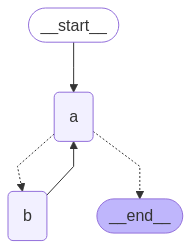

In [57]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

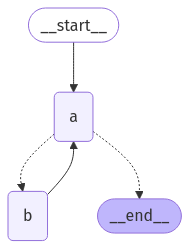

In [58]:
import requests, zlib, base64
from IPython.display import Image

# Mermaid 코드 추출
code = graph.get_graph().draw_mermaid()

# 압축·인코딩 후 Kroki 요청
encoded = base64.urlsafe_b64encode(zlib.compress(code.encode())).decode()
url = f"https://kroki.io/mermaid/png/{encoded}"
resp = requests.get(url)
display(Image(resp.content))

In [59]:
graph.invoke({"aggregate": []})

===== [Node a] =====
Node A 처리 중 현재 상태값 : []
===== [route] =====
b
===== [Node b] =====
Node B 처리 중 현재 상태값 : ['A']
===== [Node a] =====
Node A 처리 중 현재 상태값 : ['A', 'B']
===== [route] =====
b
===== [Node b] =====
Node B 처리 중 현재 상태값 : ['A', 'B', 'A']
===== [Node a] =====
Node A 처리 중 현재 상태값 : ['A', 'B', 'A', 'B']
===== [route] =====
b
===== [Node b] =====
Node B 처리 중 현재 상태값 : ['A', 'B', 'A', 'B', 'A']
===== [Node a] =====
Node A 처리 중 현재 상태값 : ['A', 'B', 'A', 'B', 'A', 'B']
===== [route] =====
END


{'aggregate': ['A', 'B', 'A', 'B', 'A', 'B', 'A']}